In [99]:
from keras.datasets import mnist 

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [101]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [102]:
#mnist.load_data()會幫我存到電腦某個地方之後教會比較快

In [103]:
len(x_test)

10000

In [104]:
len(x_train)

60000

In [105]:
X = x_train[87]

In [106]:
X.shape

(28, 28)

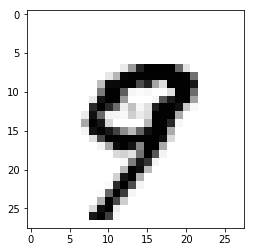

In [107]:
plt.imshow(X,cmap = 'Greys')

In [108]:
y_train[87]

9

In [109]:
x_train.shape#60000筆資料，每一張是28*28

(60000, 28, 28)

In [110]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [111]:
from keras.utils import np_utils

In [112]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [113]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [114]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [115]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [116]:
model = Sequential()
#打開Sequential型的函數學習機

In [117]:
#input:784維
#output:10維 [0123456789]


model.add(Dense(4,input_dim = 784))#第一個隱藏層 4個神經元
model.add(Activation('sigmoid'))
#所以輸出是4為

In [118]:
model.add(Dense(2))#第二個隱藏層 2個神經元 前面的輸出有4維 不但是用寫有幾維的輸入 
#因為因為它是接下去的

model.add(Activation('sigmoid'))

In [119]:
model.add(Dense(10))#輸出
model.add(Activation('softmax'))
#結果會是矩陣 會顯示像是[0.5 0.5 0 0 0 0 0 0 0 0 ] 意思是代表 
#這個圖是0有0.5的機率 這個圖是1有0.5的機率
#但也有可能是負值 
#所以用softmax從小到大排 然後給他重新定義的值 
#但是小的會是小的 大的會是大的 然後矩陣餒10個值加起來是1 

In [120]:
model.compile(loss='mse',optimizer=SGD(lr = 0.087),metrics=['accuracy'])
#optimizer要怎麼最佳化

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [122]:
#784個輸入
#4個神經元
#weight = 784*4
#每一個神經元有一個bius
784*4+4

3140

In [123]:
#4個輸入
#2個神經元
#weight = 4*2
#每一個神經元有一個bius
4*2+2

10

In [124]:
#2個輸入
#10個神經元
#weight = 2*10
#每一個神經元有一個bius
2*10+10

30

In [125]:
model.fit(x_train,y_train,batch_size=100,epochs=80)
#batch_size

#可以60000筆資料全部輸入以後，找到他的loss function值是多少 但這樣通常不太好
#因為看完60000筆 有些因為記憶的方法電腦的誤差 把一些細節忽略掉 所以這樣並不好

#所以會設定mini batch_size 就是多少筆調一次參數
#epochs 就是要訓練幾次

Epoch 1/80
60000/60000 [==============================] - 1s 10us/step - loss: 0.0911 - acc: 0.1050
Epoch 2/80
60000/60000 [==============================] - 1s 8us/step - loss: 0.0905 - acc: 0.1082
Epoch 3/80
60000/60000 [==============================] - 1s 8us/step - loss: 0.0899 - acc: 0.1220
Epoch 4/80
60000/60000 [==============================] - ETA: 0s - loss: 0.0895 - acc: 0.144 - 1s 8us/step - loss: 0.0895 - acc: 0.1451
Epoch 5/80
60000/60000 [==============================] - 1s 8us/step - loss: 0.0892 - acc: 0.1750
Epoch 6/80
60000/60000 [==============================] - 1s 8us/step - loss: 0.0889 - acc: 0.2176
Epoch 7/80
60000/60000 [==============================] - 1s 8us/step - loss: 0.0887 - acc: 0.2309
Epoch 8/80
60000/60000 [==============================] - 1s 8us/step - loss: 0.0885 - acc: 0.2407
Epoch 9/80
60000/60000 [==============================] - 0s 8us/step - loss: 0.0883 - acc: 0.2455
Epoch 10/80
60000/60000 [==============================] - 0s 8us/step

In [126]:
from ipywidgets import interact_manual

In [89]:
predict = model.predict_classes(x_test)

In [90]:
predict

array([7, 0, 1, ..., 4, 7, 6], dtype=int64)

In [92]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    #因為要畫出來 所以用.reshape(28,28)
    print('神經網路判斷為:',predict[測試編號])

神經網路判斷為: 7


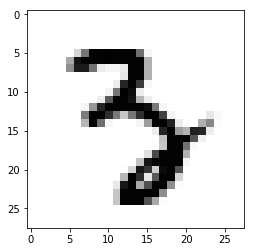

In [93]:
test(87)

In [95]:
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [96]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 11us/step


In [97]:
print('loss:',score[0],'正確率:',score[1])
#loss 是平均誤差
#不過loss很難看的出來好或不好

loss: 0.07085968244075776 正確率: 0.4691


In [98]:
model_json = model.to_json()
open('stupid_modle.json','w').write(model_json)
model.save_weights('stupid_modle_weight.h5')